In [ ]:
%load_ext autoreload
%autoreload 2

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import SVC


In [2]:
df = pd.read_csv("TD5-data_svm.txt",sep="\t",header=0,index_col=0)
print(df.shape)
# création des deux sous-data.frame des deux classes : y=+1 (p) et y=-1 (n)
dfpos = df[df['y']=='p']
dfneg = df[df['y']=='n']


(10, 3)


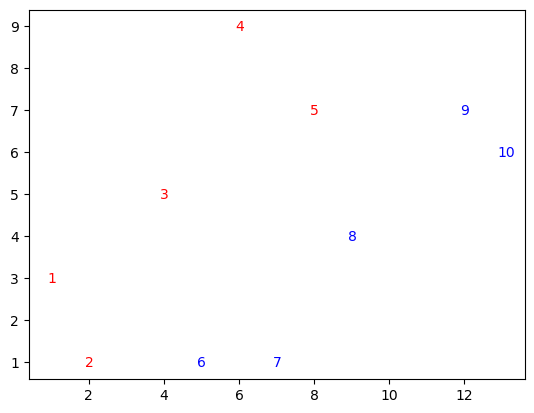

In [6]:
# affichage des instances
def myscatter(df,dfpositif,dfnegatif):
    # nuage de points "blanc" pour définir les dimensions du graphique
    plt.scatter(df.iloc[:,0],df.iloc[:,1],color="white")
    # affichage des instances positives
    for i in dfpositif.index:
        plt.annotate(i,xy=(df.loc[i,'x1'],df.loc[i,'x2']),xytext=(-3,-3),
        textcoords='offset points',color='red')
    #affichage des instances negatives
    for i in dfnegatif.index:
        plt.annotate(i,xy=(df.loc[i,'x1'],df.loc[i,'x2']),xytext=(-3,-3),
        textcoords='offset points',color='blue')
    return None
# visualisation
myscatter(df,dfpos,dfneg)
plt.show()

In [7]:
#importation de la classe SVC
svm = SVC(kernel='linear')
svm.fit(df.values[:,0:2],df.values[:,2])

SVC(kernel='linear')

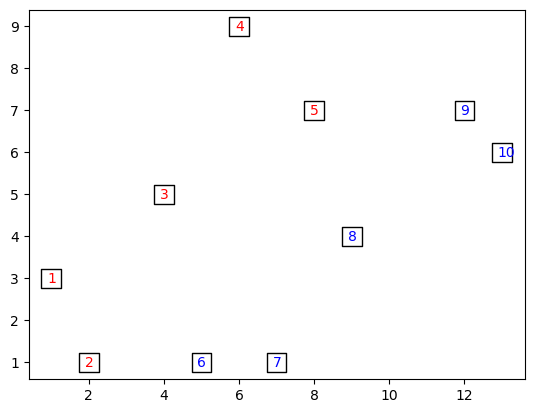

In [11]:
myscatter(df,dfpos,dfneg)
plt.scatter(df["x1"],df["x2"],marker="s", s=200,facecolors='none',edgecolors='black')
plt.show()

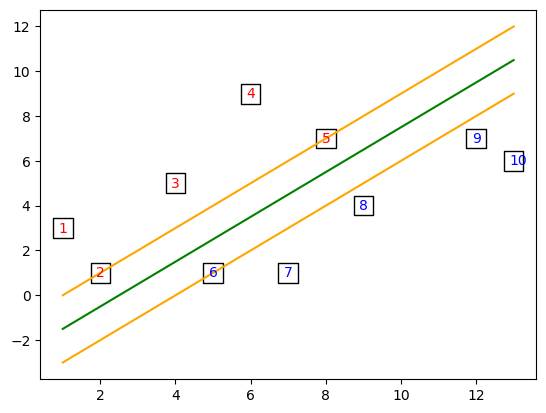

In [15]:
xx = np.array([min(df["x1"]),max(df["x1"])])
yf = -svm.coef_[0][0]/svm.coef_[0][1]*xx-svm.intercept_/svm.coef_[0][1]
yb = -svm.coef_[0][0]/svm.coef_[0][1]*xx-(svm.intercept_-1.0)/svm.coef_[0][1]
yh = -svm.coef_[0][0]/svm.coef_[0][1]*xx-(svm.intercept_+1.0)/svm.coef_[0][1]
myscatter(df,dfpos,dfneg)
plt.scatter(df["x1"],df["x2"],marker="s", s=200,facecolors='none',edgecolors='black')
plt.plot(xx,yf,c='green')
plt.plot(xx,yb,c='orange')
plt.plot(xx,yh,c='orange')
plt.show()
